In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

#Loard dataset
df=pd.read_csv(r"C:/Users/DELL/Desktop/DATA SCIENCE/movies_updated.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime,,  4000 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 468.9+ KB


In [38]:
df.isnull().sum()

name           0
rating        40
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         1
star           1
country        0
budget         0
gross        169
company       10
runtime,,      0
dtype: int64

In [40]:
df.duplicated().value_counts()

False    4000
Name: count, dtype: int64

In [42]:
df.drop_duplicates(inplace=True)

In [44]:
df.shape

(4000, 15)

In [46]:
# Description of the Data
df.describe()

,year,score,votes,budget,gross
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,3.831000e+03
mean,1991.191500,6.321950,5.449450e+04,1.542740e+07,4.172202e+07
std,5.934529,0.977101,1.427738e+05,2.248639e+07,9.259504e+07
min,1980.000000,2.200000,5.100000e+01,0.000000e+00,3.090000e+02
25%,1986.000000,5.700000,4.300000e+03,0.000000e+00,2.835743e+06
50%,1991.000000,6.400000,1.300000e+04,7.000000e+06,1.183822e+07
75%,1996.000000,7.000000,4.500000e+04,2.100000e+07,3.560495e+07
max,2001.000000,9.300000,2.400000e+06,2.000000e+08,2.201647e+09


In [ ]:
#Exploratory Data Analysis(EDA)

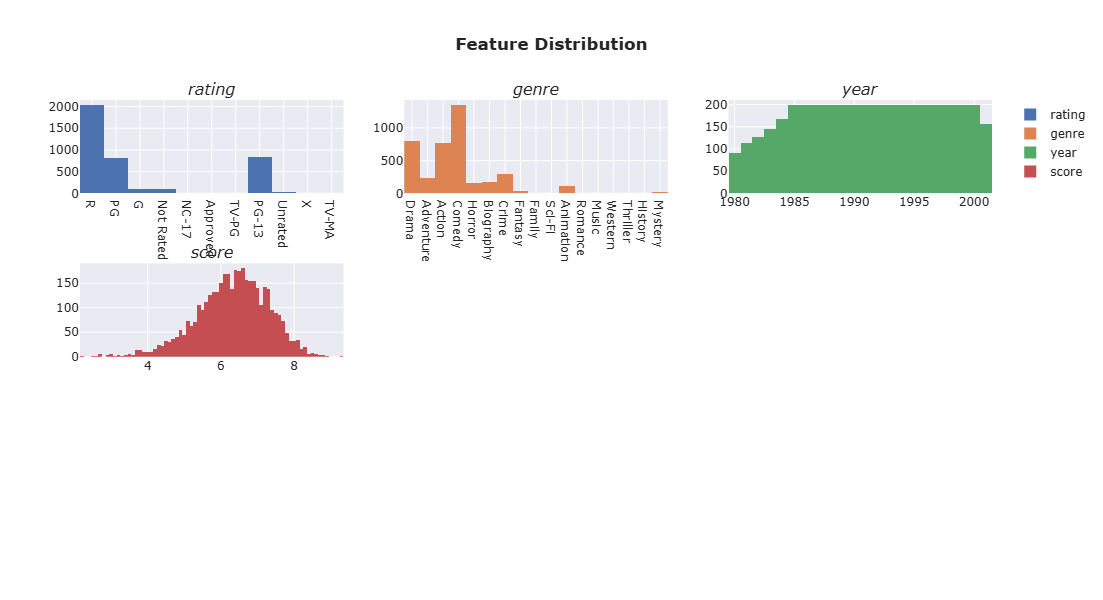

In [52]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>rating', '<i>genre', '<i>year','<i>score',))
fig.add_trace(go.Histogram(x=df['rating'],name='rating'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['genre'],name='genre'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['year'],name='year'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['score'],name='score'),row=2,col=1)


fig.update_layout(height=600,width=600,title_text='<b>Feature Distribution')
fig.update_layout(template='seaborn',title_x=0.5)


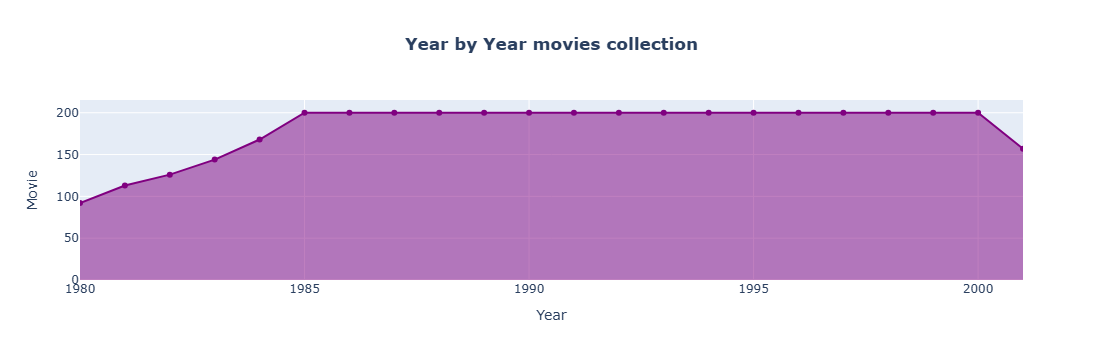

In [54]:
fig=px.area(df.groupby('year',as_index=False).count().sort_values(by='name',ascending=False).sort_values(by='year'),x='year',y='name',markers=True,labels={'movie':'Total movies'},color_discrete_sequence=['purple'],title='<b>Year by Year movies collection')

fig.update_layout(hovermode='x',title_x=0.5, xaxis_title='Year', yaxis_title='Movie')

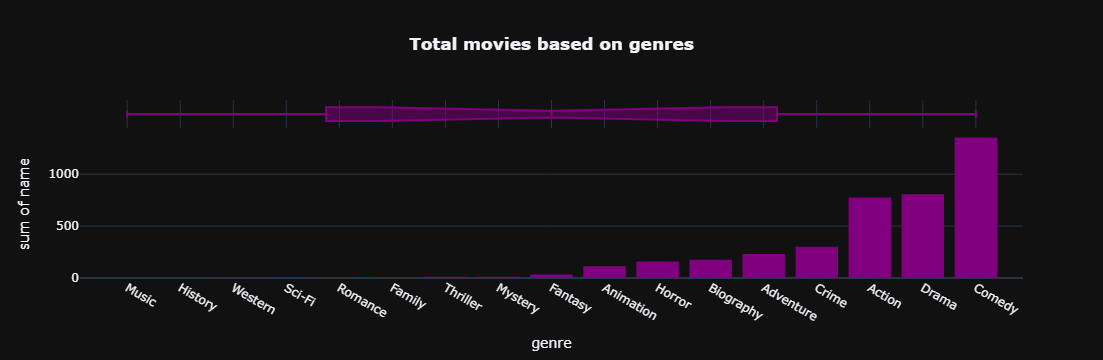

In [56]:
fig=px.histogram(df.groupby('genre',as_index=False).count().sort_values(by='name',ascending=True),x='genre',y='name',color_discrete_sequence=['purple'],template='plotly_dark',marginal='box',title='<b>Total movies based on genres</b>')
fig.update_layout(title_x=0.5)

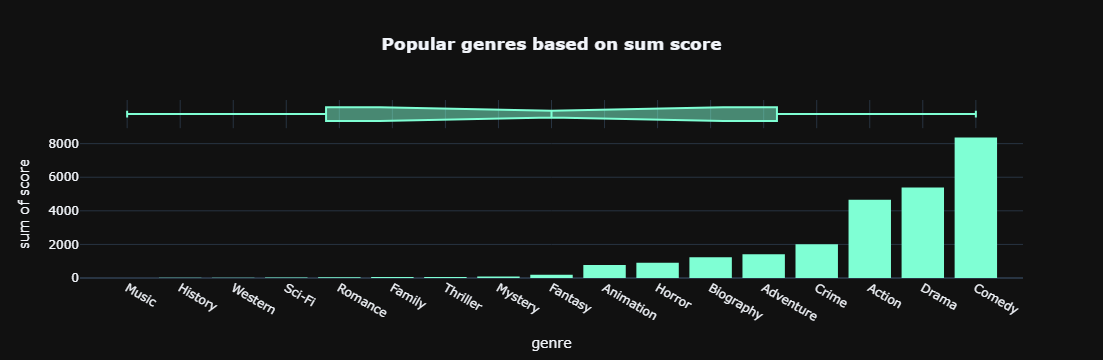

In [58]:
fig=px.histogram(df.groupby('genre',as_index=False).sum().sort_values(by='score',ascending=True),x='genre',y='score',color_discrete_sequence=['aquamarine'],template='plotly_dark',marginal='box',title='<b>Popular genres based on sum score</b>')
fig.update_layout(title_x=0.5)

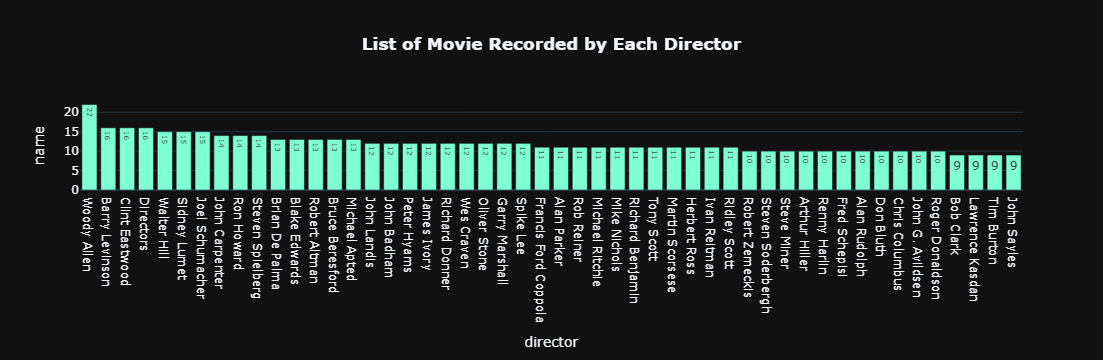

In [64]:
fig = px.bar(df.groupby('director',as_index=False).count().sort_values(by='name',ascending=False).head(50),x='director',y='name',labels={'movie':'Total Movies'},width=1000,color_discrete_sequence=['aquamarine'],template='plotly_dark',text='name',title='<b> List of movie Recorded by Each director')
fig.update_layout(title='<b>List of Movie Recorded by Each Director</b>', title_x=0.5)

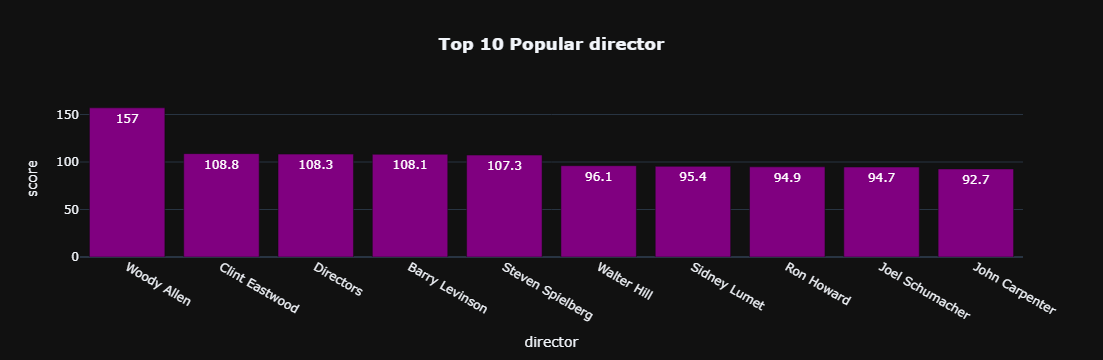

In [66]:
fig = px.bar(df.groupby('director',as_index=False).sum().sort_values(by='score',ascending=False).head(10),x='director',y='score',color_discrete_sequence=['purple'],template='plotly_dark',text='score',title='<b>Top 10 Popular director')
fig.update_layout(title_x=0.5)

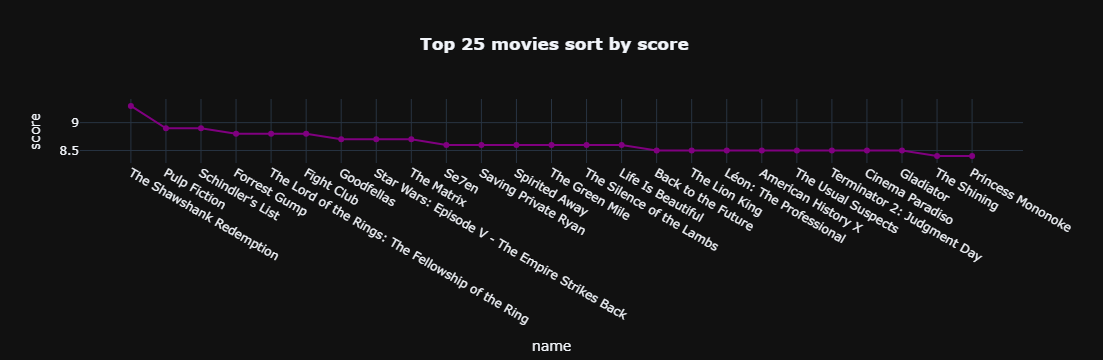

In [68]:
fig=px.line(df.sort_values(by='score',ascending=False).head(25),x='name',y='score',hover_data=['director'],color_discrete_sequence=['purple'],template="plotly_dark",markers=True,title='<b> Top 25 movies sort by score')
fig.update_layout(title_x=0.5)
fig.show()

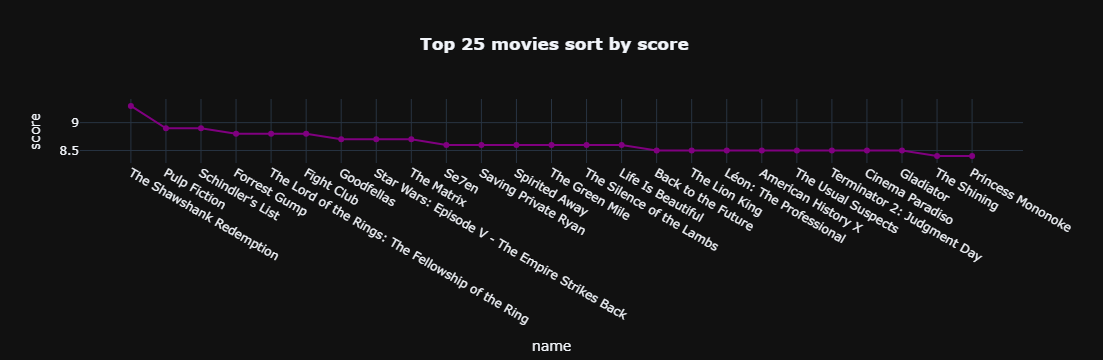

In [70]:
px.bar(df.groupby('star',as_index=False).sum().sort_values(by='score',ascending=False).head(10),x='star',y='score',color_discrete_sequence=['purple'],template='plotly_dark',text='score',title='<b>Top 10 star acter/actress')
fig.update_layout(title_x=0.5)


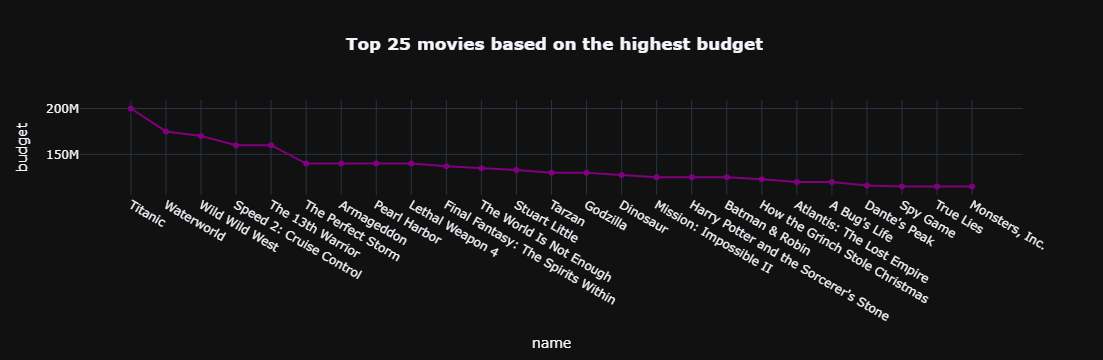

In [72]:
fig=px.line(df.sort_values(by='budget',ascending=False).head(25),x='name',y='budget',hover_data=['director'],color_discrete_sequence=['purple'],template="plotly_dark",markers=True,title='<b> Top 25 movies based on the highest budget')
fig.update_layout(title_x=0.5)
fig.show()

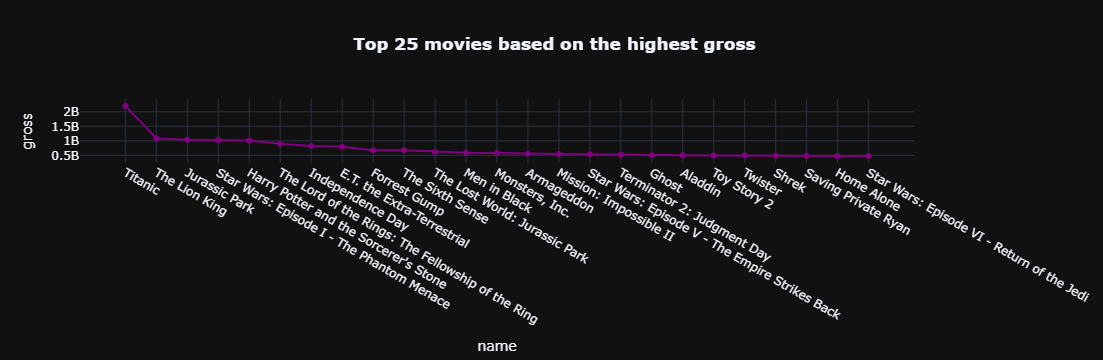

In [74]:
fig=px.line(df.sort_values(by='gross',ascending=False).head(25),x='name',y='gross',hover_data=['director'],color_discrete_sequence=['purple'],template="plotly_dark",markers=True,title='<b> Top 25 movies based on the highest gross')
fig.update_layout(title_x=0.5, xaxis=dict(tickmode='linear', dtick=1))
fig.show()

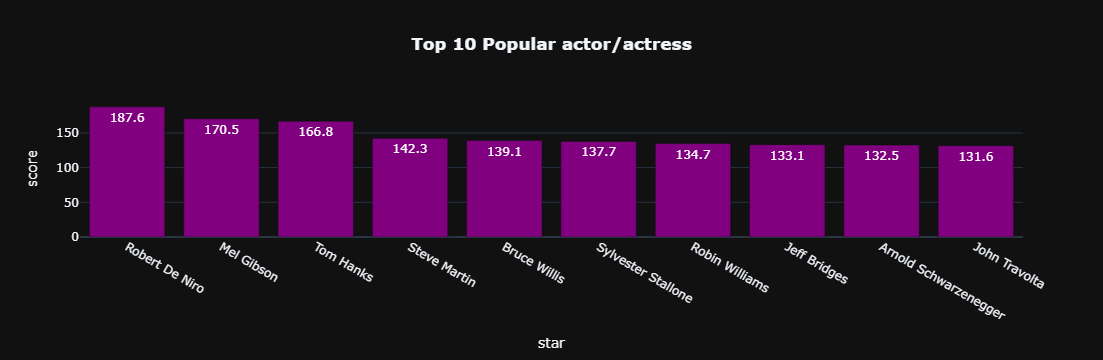

In [76]:
fig = px.bar(df.groupby('star',as_index=False).sum().sort_values(by='score',ascending=False).head(10),x='star',y='score',color_discrete_sequence=['purple'],template='plotly_dark',text='score',title='<b>Top 10 Popular actor/actress')
fig.update_layout(title_x=0.5)

In [ ]:
#Conclusion
#After performing the exploratory data analysis, we have gained several insights about the movie dataset.

#Best Movie by Rating
#The best movie based on rating is the shawshank redemption with an average rating of 9.3.

#Most Expensive Movie
#The most expensive movie is Titanic with a budget of $200 million.

#Best Movie Stars
#The best movie stars for playing in a movie based on their average rating are:

#Robert De Niro with score of 187.6
#Mel Gibson with score of 170.5
#Tom Hanks with score of 166.5
#Based on these insights, we can conclude that the shawshank redemption is the best movie in our dataset based on rating, Titanic is the most expensive movie, and Robert De Niro, Mel Gibson and Tom Hanks are the best movie stars for playing in a movie based on their score.